In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from metadata.const import features, class_label

2022-05-26 12:48:00.617989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 12:48:00.618008: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('dataset/clean-sample-200000.csv')
df.head()

,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Min,...,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Idle Std,Label
0,1.0,2.0,2736.0,1368.0,1368.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.294967e+09,4.294967e+09,0.0,0.0,0.0,True
1,2.0,2.0,2544.0,1272.0,1272.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,4.294967e+09,4.294967e+09,0.0,0.0,0.0,True
2,1.0,2.0,2736.0,1368.0,1368.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.294967e+09,4.294967e+09,0.0,0.0,0.0,True
3,3.0,2.0,1040.0,520.0,520.0,0.0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,4.294967e+09,4.294967e+09,0.0,0.0,0.0,True
4,1.0,2.0,2656.0,1328.0,1328.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.294967e+09,4.294967e+09,0.0,0.0,0.0,True


In [3]:
selected_features = [features['fwd_packet_len_min'], features['ack_flag_count'], features['init_win_bytes_fwd'],
                     features['total_fwd_packets'], features['idle_std']]
# X = df.drop(class_label, axis=1).values
X = df[selected_features]
Y = df[class_label].values

In [4]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
one_hot_encoder = OneHotEncoder()
Y = one_hot_encoder.fit_transform(Y.reshape(-1, 1)).toarray()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
model = Sequential()
model.add(Dense(5, input_dim=len(df[selected_features].columns), activation='relu'))
model.add(Dense(2, activation='softmax'))

2022-05-26 12:48:30.042039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-26 12:48:30.042061: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-26 12:48:30.042078: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fatemeh): /proc/driver/nvidia/version does not exist
2022-05-26 12:48:30.052427: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['binary_accuracy'])

In [9]:
history = model.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
4312/4312 [==============================] - 8s 1ms/step - loss: 0.2720 - binary_accuracy: 0.9225
Epoch 2/40
4312/4312 [==============================] - 5s 1ms/step - loss: 0.0542 - binary_accuracy: 0.9859
Epoch 3/40
4312/4312 [==============================] - 5s 1ms/step - loss: 0.0359 - binary_accuracy: 0.9872
Epoch 4/40
4312/4312 [==============================] - 6s 1ms/step - loss: 0.0300 - binary_accuracy: 0.9886
Epoch 5/40
4312/4312 [==============================] - 6s 1ms/step - loss: 0.0268 - binary_accuracy: 0.9896
Epoch 6/40
4312/4312 [==============================] - 6s 1ms/step - loss: 0.0247 - binary_accuracy: 0.9910
Epoch 7/40
4312/4312 [==============================] - 5s 1ms/step - loss: 0.0231 - binary_accuracy: 0.9935
Epoch 8/40
4312/4312 [==============================] - 5s 1ms/step - loss: 0.0220 - binary_accuracy: 0.9946
Epoch 9/40
4312/4312 [==============================] - 6s 1ms/step - loss: 0.0211 - binary_accuracy: 0.9951
Epoch 10/40
4312/43

In [10]:
Y_pred = model.predict(X_test)
pred = list()
for i in range(len(Y_pred)):
    pred.append(np.argmax(Y_pred[i]))
test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

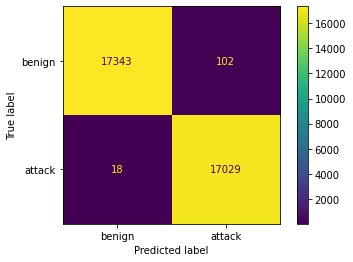

In [11]:
cm = confusion_matrix(test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign', 'attack'])
cmd.plot()

In [12]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17445
           1       0.99      1.00      1.00     17047

    accuracy                           1.00     34492
   macro avg       1.00      1.00      1.00     34492
weighted avg       1.00      1.00      1.00     34492

